In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, degree=None, gamma=None, coef0=None):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        self.degree = degree # 多項式カーネル用の次数
        self.gamma = gamma # 多項式カーネル用のガンマ
        self.coef0 = coef0 # 多項式カーネル用のシータの0番目の値        
        
        
    def fit(self, X, y):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        self.lam = np.random.rand(X.shape[0])
        
        for _ in range(self.iter):
            self.lam = self._gradient_descent(X, y)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print(np.where(self.lam > self.threshold)) # サポートベクターのインデックス            
            
        self.index_support_vectors = np.where(self.lam > self.threshold) # サポートベクターのインデックス
        self.n_support_vectors = len(self.index_support_vectors) # サポートベクターの数
        self.X_sv = X[self.index_support_vectors] # サポートベクターの特徴量
        self.y_sv = y[self.index_support_vectors] # サポートベクターのラベル
        self.lam_sv = self.lam[self.index_support_vectors] # サポートベクターの未定乗数
        

    def _gradient_descent(self, X, y):
        """
        最急降下法により学習させる

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : float
            誤差
            
        Returns
        lam : 次の形のndarray, shape (n_features,)
          パラメータ        
        """
        if self.kernel == 'linear':
            lam = self.lam + self.lr * (1 - y * (self._linear_k(X, X) @ (self.lam * y)))
        elif self.kernel == 'poly':
            lam = self.lam + self.lr * (1 - y * (self._polynomial_k(X, X) @ (self.lam * y)))    
        
        lam[lam < 0] = 0
        
        return  lam
    
    
    def _linear_k(self, Xi, Xj):
        """
        線形のカーネル関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
        y : 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        y = Xj @ Xi.T
        
        return y    
    
    def _polynomial_k(self, Xi, Xj):
        """
        線形のカーネル関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
        y : 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        y = (self.gamma*(Xj @ Xi.T) +self.coef0)**self.degree
        
        return y    
    
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        fX = (self.y_sv * self.lam_sv) @ self._linear_k(X, self.X_sv)
        y_pred = np.where(fX >= 0, 1, -1)

        return y_pred

# 【問題1】ラグランジュの未定乗数法による最急降下

## ① ラグランジュの未定乗数法による最急降下法

# $\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})$

## gradient descent の実装
```python 
def _gradient_descent(self, X, y):
    """
    最急降下法により学習させる

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    error : float
        誤差

    Returns
    lam : 次の形のndarray, shape (n_features,)
      パラメータ        
    """
    lam = self.lam + self.lr * (1 - y * (self._linear_k(X, X) @ (self.lam * y)))
    lam[lam < 0] = 0

    return  lam
```

# ② 線形カーネル

# $k(x_i, x_j) = x_{i}^{T} x_j$

## 線形カーネルの実装
```python 
def _linear_k(self, Xi, Xj):
    """
    線形のカーネル関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
    y : 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    y = Xj @ Xi.T

    return y    
```

# 【問題2】サポートベクターの決定

## fit の実装
```python 
def fit(self, X, y, X_val=None, y_val=None):
    """
    SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    """

    self.lam = np.random.rand(X.shape[0])

    for _ in range(self.iter):
        self.lam = self._gradient_descent(X, y)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(np.where(self.lam > self.threshold)) # サポートベクターのインデックス            

    self.index_support_vectors = np.where(self.lam > self.threshold) # サポートベクターのインデックス
    self.n_support_vectors = len(self.index_support_vectors) # サポートベクターの数
    self.X_sv = X[self.index_support_vectors] # サポートベクターの特徴量
    self.y_sv = y[self.index_support_vectors] # サポートベクターのラベル
    self.lam_sv = self.lam[self.index_support_vectors] # サポートベクターの未定乗数
```

# 【問題3】推定

# $f(x) = \sum_{n=1}^{N}\lambda_n y_{sv\_n} k(x, s_n)$

## predict の実装
```python 
def predict(self, X):
    """
    SVM分類器を使いラベルを推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        SVM分類器による推定結果
    """
    fX = (self.y_sv * self.lam_sv) @ self._linear_k(X, self.X_sv)
    y_pred = np.where(fX >= 0, 1, -1)

    return y_pred
```

# 【問題4】学習と推定

In [3]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [4]:
#　訓練データと検証データに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0) # 訓練データ75%、検証データ25%として分割

In [5]:
# インスタンス作成
svm = ScratchSVMClassifier(1000, 0.001, kernel='linear', threshold=0.0001, verbose=False)

In [6]:
# 学習
svm.fit(X_train, y_train)

In [7]:
# サポートベクターの未定乗数を表示
svm.lam_sv

array([0.03841473, 0.01314661, 0.45326507, 0.43900667, 0.06619519,
       0.0411765 ])

In [8]:
# 推定
y_val_pred = svm.predict(X_val)

In [9]:
# 評価
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）：　{}\n".format(accuracy_score(y_val, y_val_pred)))

from sklearn.metrics import precision_score
print("Precision（適合率）：　{}\n".format(precision_score(y_val, y_val_pred, average='macro')))

from sklearn.metrics import recall_score
print("Recall（再現率）：　{}\n".format(recall_score(y_val, y_val_pred, average='macro')))

Accuracy（正解率）：　1.0

Precision（適合率）：　1.0

Recall（再現率）：　1.0



# 【問題5】決定領域の可視化

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 決定領域を表示する関数
def decision_region(X, y, index, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    print(X.shape)        
    plt.scatter(X[np.array(index), 0], X[np.array(index), 1], s=80, color='yellow', marker='o')                
            
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [11]:
# 推定
y_train_pred = svm.predict(X_train)

(375, 2)


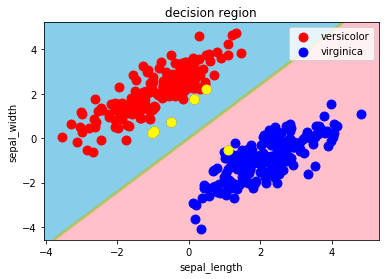

In [12]:
# 決定領域の可視化
decision_region(X_train,  y_train_pred, svm.index_support_vectors, svm, step=0.01, title='decision region', xlabel='sepal_length', ylabel='sepal_width', target_names=['versicolor', 'virginica'])

# 【問題6】（アドバンス課題）多項式カーネル関数の作成

## 多項式カーネルの実装
```python 
def _polynomial_k(self, Xi, Xj):
    """
    線形のカーネル関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
    y : 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    y = (self.gamma*(Xj @ Xi.T) +self.coef0)**self.degree

    return y    
```

In [13]:
# 多項式カーネルでインスタンス作成
svm1 = ScratchSVMClassifier(10000, 0.01, kernel='poly', threshold=0.00001, verbose=False, degree=3, gamma=0.1, coef0=0)

In [14]:
# 学習
svm1.fit(X_train, y_train)

In [15]:
# サポートベクターの未定乗数を表示
svm1.lam_sv

array([14.13781701, 33.95989708, 10.13468788, 78.21216626,  5.767317  ,
       34.46321727, 44.96731243, 62.95156082,  0.94099018, 63.27199418,
       21.97032756])

In [16]:
# 推定
y1_val_pred = svm1.predict(X_val)
print(y1_val_pred)

[-1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1]


In [17]:
# 評価
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）：　{}\n".format(accuracy_score(y_val, y1_val_pred)))

from sklearn.metrics import precision_score
print("Precision（適合率）：　{}\n".format(precision_score(y_val, y1_val_pred, average='macro')))

from sklearn.metrics import recall_score
print("Recall（再現率）：　{}\n".format(recall_score(y_val, y1_val_pred, average='macro')))

Accuracy（正解率）：　1.0

Precision（適合率）：　1.0

Recall（再現率）：　1.0

